# 结合Pandas与sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


# 构造数据
np.random.seed(0)
df = pd.DataFrame({'Condition 1':np.random.rand(20),
                  'Condition 2':np.random.rand(20)*0.9,
                  'Condition 3':np.random.rand(20)*1.1})
df.head()


,Condition 1,Condition 2,Condition 3
0,0.548814,0.880757,0.395459
1,0.715189,0.719243,0.480735
2,0.602763,0.415331,0.767394
3,0.544883,0.702476,0.066248
4,0.423655,0.106447,0.733443


<AxesSubplot: >

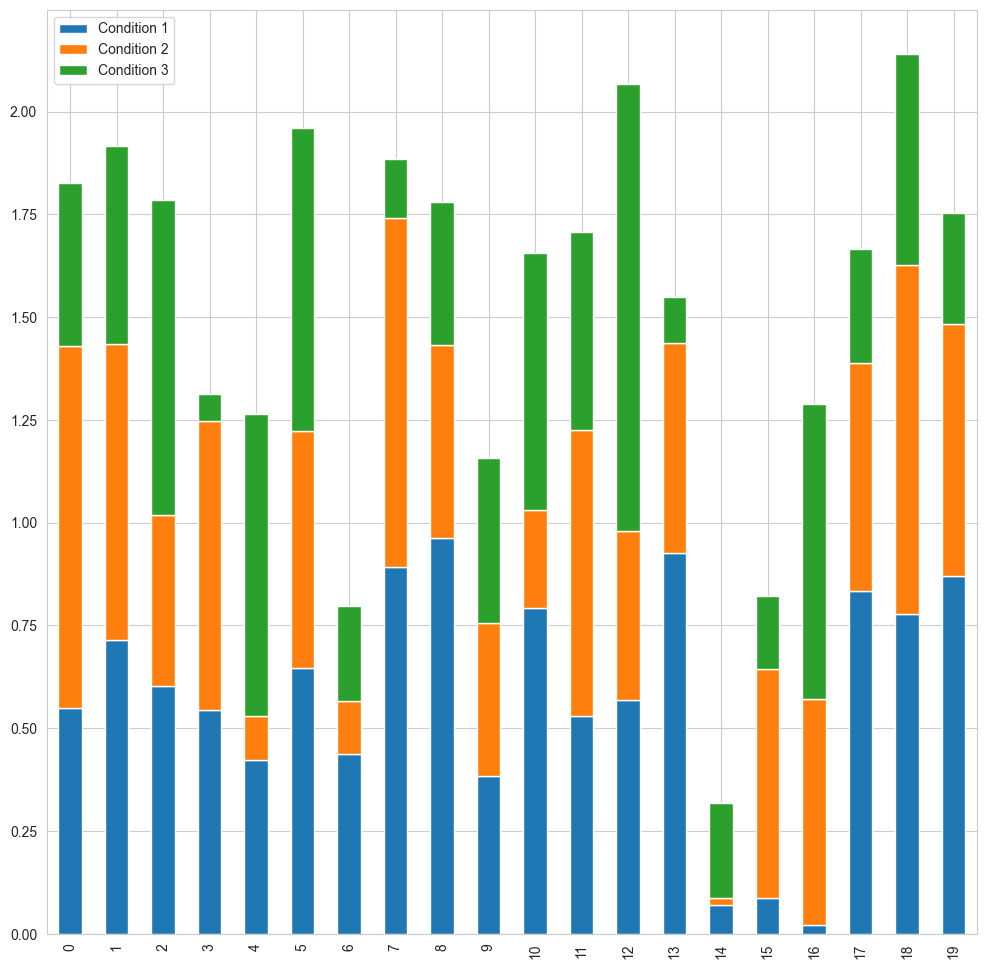

In [2]:
# 画出条形图
fig,ax = plt.subplots(figsize = (12,12))
#df.plot.bar(ax = ax)
# 查看堆叠的情况: 可以查看数据的整体情况，设置属性：stacked = True
df.plot.bar(ax = ax,stacked = True)


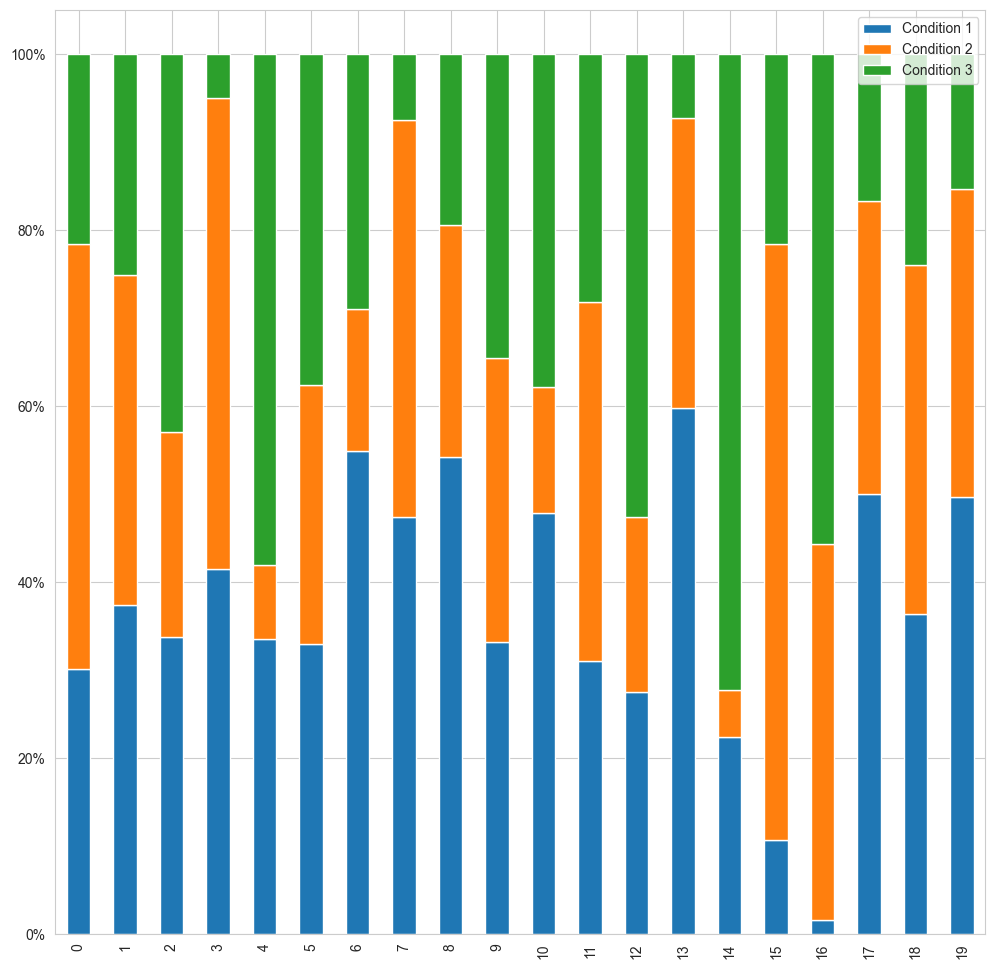

In [3]:
# 统计20 条数据中各种颜色所占的百分比情况
#借助工具
from matplotlib.ticker import FuncFormatter
# 算出百分比，赋值给新的变量: df.div(df.sum(axis = 1)),每一数据都除以每一行数据的和
df_ratio = df.div(df.sum(axis = 1),axis = 0)

# 指定画布的大小
fig,ax = plt.subplots(figsize = (12,12))
df_ratio.plot.bar(ax = ax,stacked = True)

# 设置Y轴的坐标值为百分比情况
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_:'{:.0%}'.format(y)))

In [4]:
# 在pandas 中可以直接读取url: 此时就不用了下载，可以直接下载了
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
# 把东西读进来
df = pd.read_csv(url,na_values = "?")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [7]:
# 对于数据中的缺失值，进行填充，（用平均值）

from sklearn.impute import SimpleImputer

impute = pd.DataFrame(SimpleImputer().fit_transform(df))
impute.columns = df.columns
impute.index = df.index
impute.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,6.140845,5.816901,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# pac: 主成分分析 数据分析，挑选出更好列地来分析数据，进行映射成更好地维度

%matplotlib notebook
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# 目的就是怎么利用当前的sklearn 得到当前的结果
features = impute.drop('Dx:Cancer',axis = 1)    # 使features 里不包含标签：Dx:Cancer，吃了标签就是特征
y = impute['Dx:Cancer']


# 做一个PCA
pca = PCA(n_components = 3)
X_r = pca.fit_transform(features)

# 打印前三个
print("Explained variances:\nPC1 {:.2%}\nPC2 {:.2%}\nPC3 {:.2%}"
     .format(pca.explained_variance_ratio_[0],
            pca.explained_variance_ratio_[1],
            pca.explained_variance_ratio_[2]))
# 以上执行结果：
# Explained variances:
# PC1 59.41%
# PC2 14.59%
# PC3 9.02%

# 指定3D的画布
fig = plt.figure(figsize = (8,6))
ax = Axes3D(fig)

#ax.scatter() 画散点图
ax.scatter(X_r[:,0],X_r[:,1],X_r[:,2],c = y,cmap = plt.cm.coolwarm)
                 
                 # Label the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
                 

Explained variances:
PC1 59.41%
PC2 14.59%
PC3 9.02%


<IPython.core.display.Javascript object>

Text(0.5, 0, 'PC3')

# Seaborn 简介

笔记：
- 第一点： seaborn 在matplotlib 的基础上进行了一层封装，有很多的模板，可以直接乡里A面直接传数据，就不用了在写如此多的代码了， 可视化工具非常重要

In [10]:
# 导入所依赖的库
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# 在写完代码，就可以将图展示在notebook上的命令
%matplotlib inline

# 整体布局与风格设置

In [11]:
# 构造数据，定义函数
def sinplot(flip = 1):
    # 用np.linspace()函数，在0-14 上找出100 个点，构造数据
    x = np.linspace(0,14,100)
    # 用for画6 条线，每条线都是sin 函数，大小不同
    for i in range(1,7):
        plt.plot(x,np.sin(x + i*.5)*(7 - i)*flip)

C:\Users\xyt55\AppData\Local\Temp\ipykernel_32484\2056339931.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


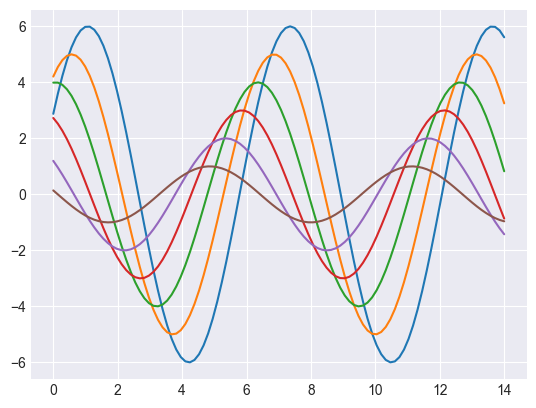

In [12]:
 # 在seaborn 中有5 个模板
    # 设置画图风格： plt.style.use('') 在第8天 - 视频5- 中涉及到
plt.style.use('seaborn-darkgrid')
sinplot()

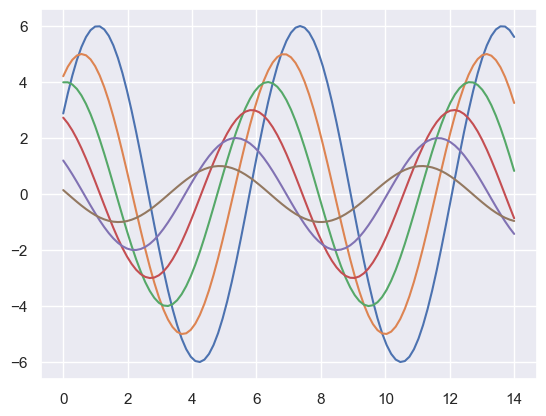

In [13]:
#用seanborn 默认的组合
sns.set()
sinplot()

# 5中主题风格
 - 第一点：darkgrid
 - 第二点：whitegrid
 - 第三点：dark
 - 第四点：white
 - 第五点：ticks

<AxesSubplot: >

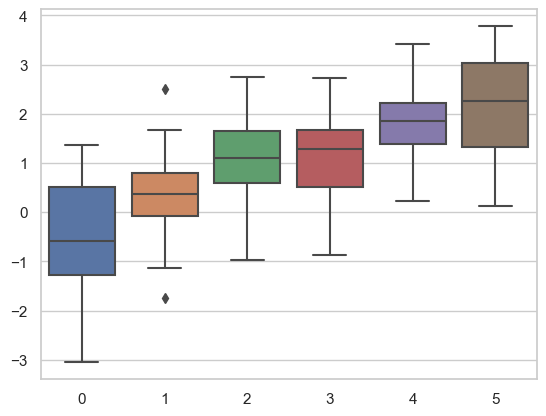

In [14]:
sns.set_style('whitegrid')
data = np.random.normal(size = (20,6)) + np.arange(6) / 2
# 画的盒图
sns.boxplot(data = data)

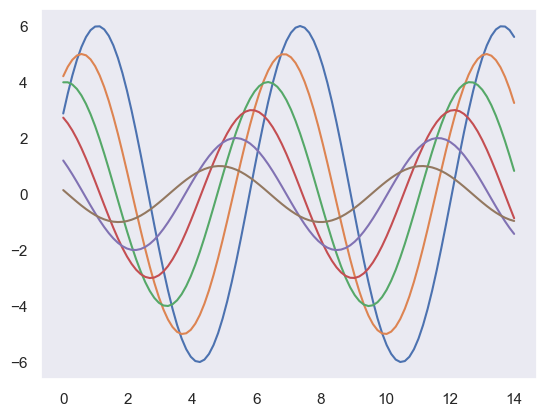

In [15]:
sns.set_style('dark')
sinplot()

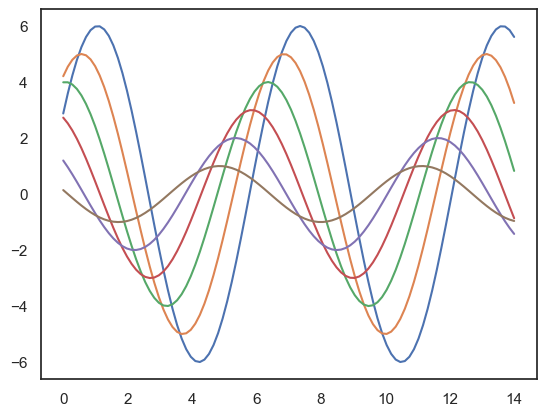

In [16]:
sns.set_style('white')
sinplot()

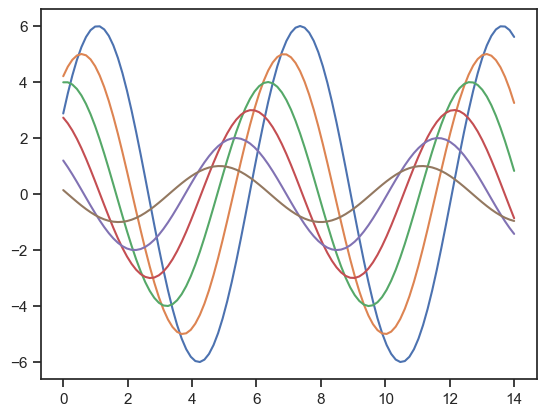

In [17]:
sns.set_style('ticks')     # 在坐标轴上加上刻度
sinplot()

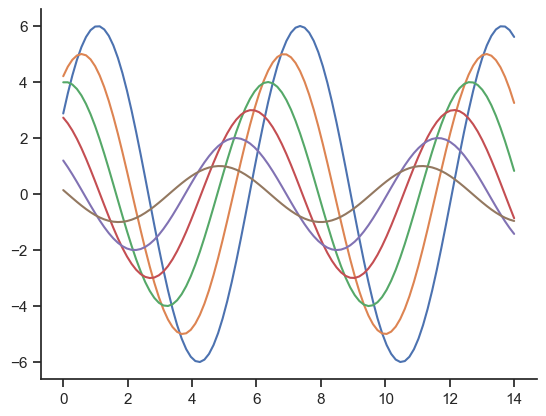

In [18]:
# 去掉上面，右边的坐标轴: sns.despine(),对画风进行改变
sinplot()
sns.despine()

# 风格细节设置

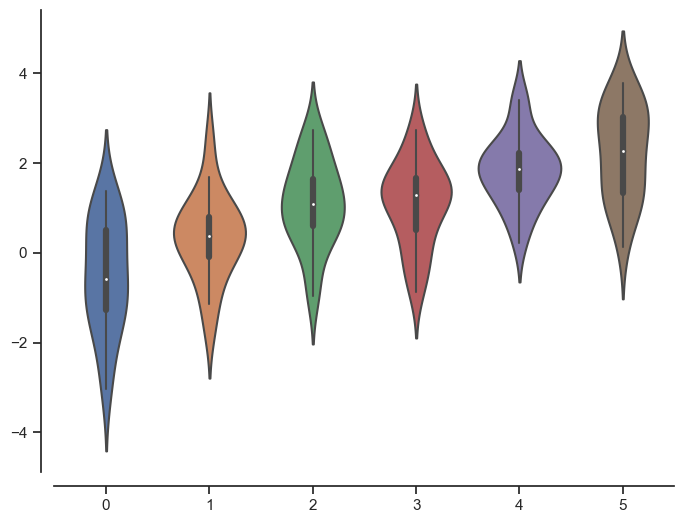

In [19]:
fig = plt.figure(figsize = (8,6))
# 画小提琴图plt.violinplot() 函数
sns.violinplot(data)

# sns.despine() 函数的默认设置，就是将上轴和右边的坐标轴去掉
# 进行设置，进行设置offset = 10，轴离图像的距离
sns.despine(offset = 10)

<AxesSubplot: >

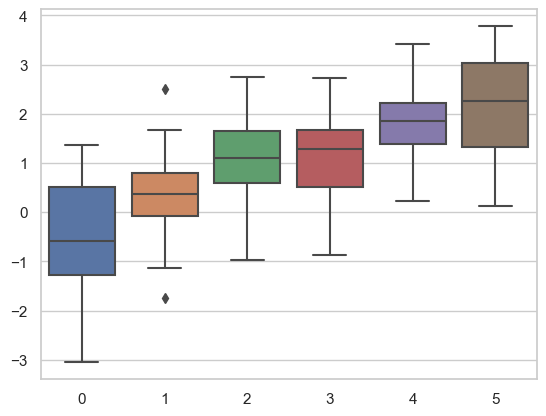

In [20]:
# 对当前的坐标轴的保留操作

sns.set_style('whitegrid')
sns.boxplot(data = data,palette = 'deep')
# sns.despine(left = True)     # 将左边的轴隐藏起来，指定left = True

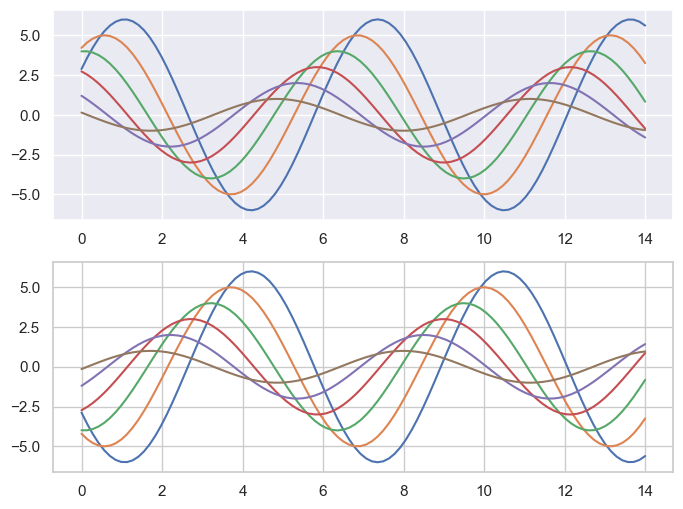

In [21]:
# 指定当前的子图的风格不一样

fig = plt.figure(figsize = (8,6))

# 可以用with 打开一种风格
with sns.axes_style('darkgrid'):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

In [22]:
# 用其默认值
sns.set()

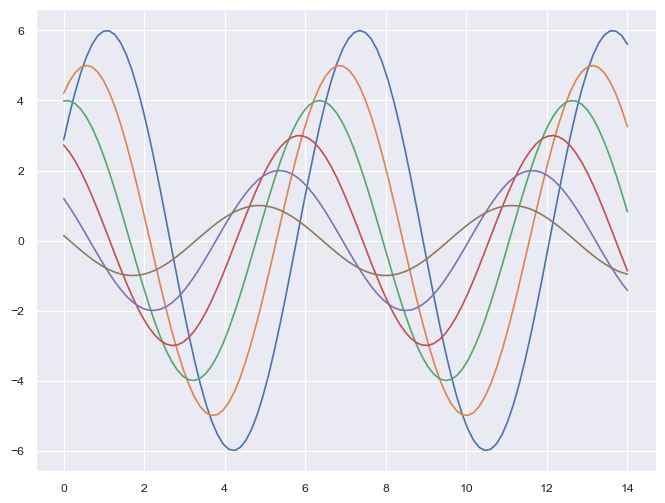

In [23]:
sns.set_context("paper")
plt.figure(figsize = (8,6))
sinplot()

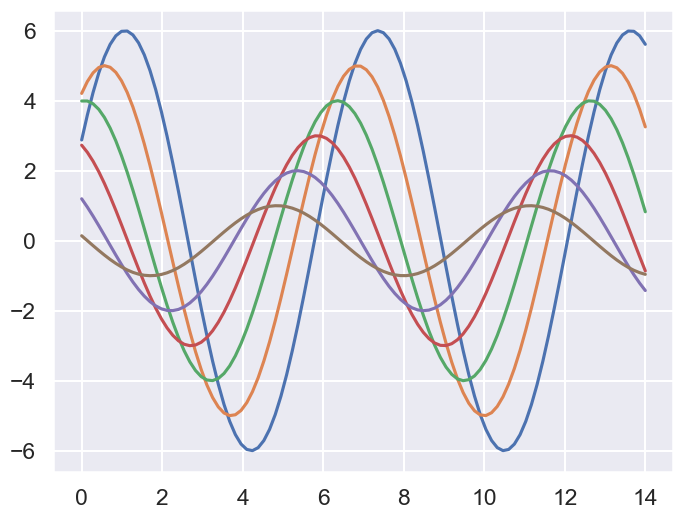

In [24]:
sns.set_context("talk")
plt.figure(figsize = (8,6))
sinplot()

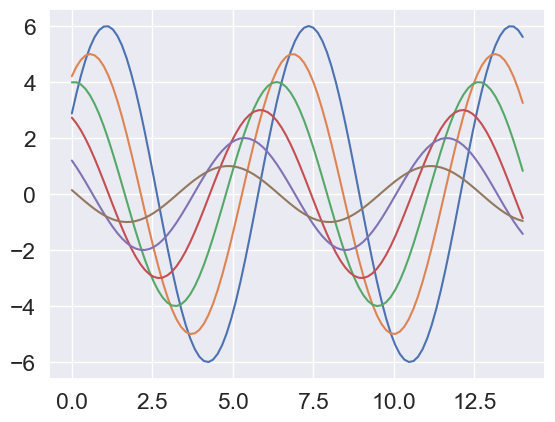

In [25]:
# 指定字体的大小： font_scale = 1.5,  指定线的宽度 ：rc = {"lines.linewidth":2.5}

sns.set_context("notebook",font_scale = 1.5,rc = {"lines.linewidth":1.5})
sinplot()

# 调色板

笔记：
- 第一点：color_palette() 能传入任何Matplotlib 所支持的颜色
- 第二点：color_palette() 不写参数则默认颜色
- 第三点：set_palette() 设置所有图的颜色


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

sns.set(rc = {'figure.figsize':(6,6)})

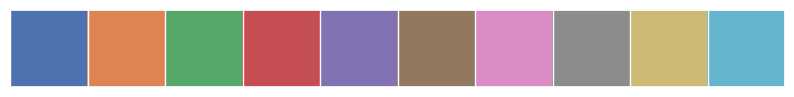

In [27]:
# 使用Seaborn 怎么样调用调色板


# 分类色板

current_palette = sns.color_palette()
sns.palplot(current_palette)

6 个默认颜色循环主题：deep,muted,pastel,bright,dark,colorblind, 现在已经改变了

# 圆形画板
-笔记：
- 第一点：最常用的方法就是使用hls的颜色空间，这是RGB 的一个简单转换

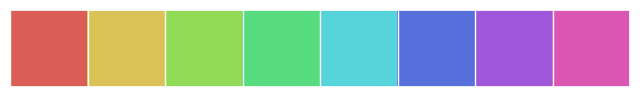

In [28]:
# 要得到8 种颜色，写出颜色

sns.palplot(sns.color_palette('hls',8))


<AxesSubplot: >

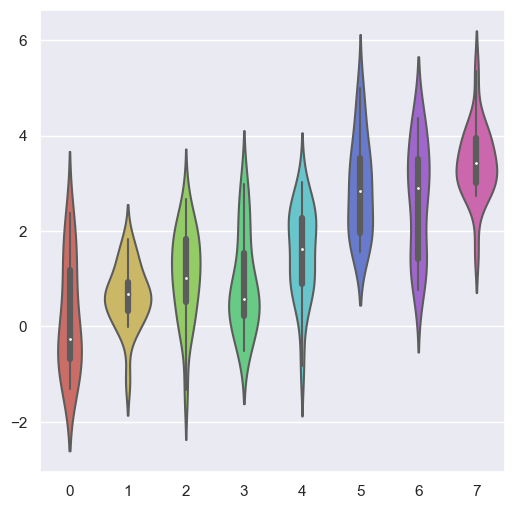

In [29]:

# 怎样将颜色放到数据当中？     先构造数据
data = np.random.normal(size = (20,8)) + np.arange(8)/2
sns.violinplot(data = data,palette = sns.color_palette("hls",8))

<AxesSubplot: >

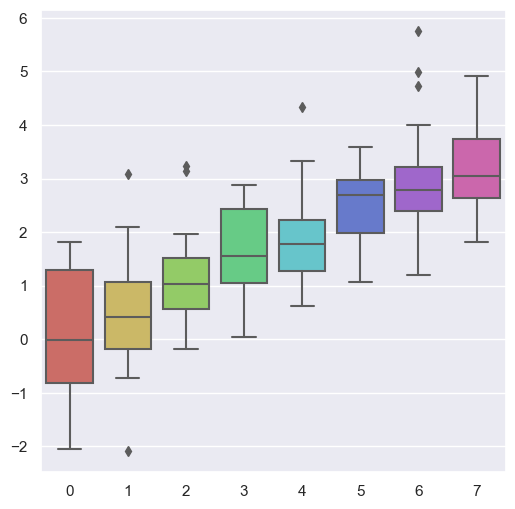

In [30]:

# 怎样将颜色放到数据当中？     先构造数据
data = np.random.normal(size = (20,8)) + np.arange(8)/2

# 将数据和颜色传进去  ： 颜色得到：palette = sns.color_palette(" 空间"，得到的颜色的个数)
sns.boxplot(data = data,palette = sns.color_palette("hls",8))

# hls_palette() 函数来控制颜色的亮度和饱和度
- 第一点：l -  亮度 lightness
- 第二点：s - 饱和度 saturation

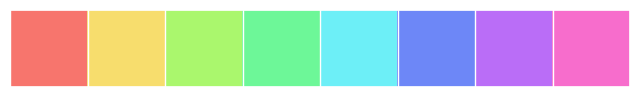

In [31]:
# sns.palplot(sns.hls_palette(要画出的颜色的个数，亮度，饱和度)) 
sns.palplot(sns.hls_palette(8,l = 0.7,s = 0.9))

# ValueError: RGBA values should be within 0-1 range 

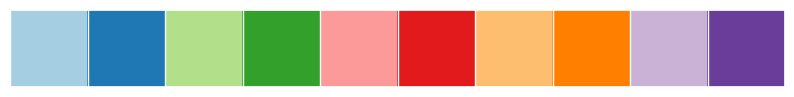

In [32]:
# "Paired" 此时调出来的颜色都是成对出现的，可以用于比较不同国家的运动员：颜色差别较大，同一国家的运动员：颜色相差较小

sns.palplot(sns.color_palette("Paired",10))

# 使用xkcd 颜色来命名 颜色
xkcd 包含了一些众包努力的针对随机RGB色的命名，产生954 个可以谁是通过xkcd_rgb字典中调用的命名颜色

In [33]:

# plt.plot([0,1],[0,1],sns,xkcd_rgb['pale red'],lw = 3)
# plt.plot([0,1],[0,2],sns,xkcd_rgb['medium green'],lw = 3)
# plt.plot([0,1],[0,3],sns,xkcd_rgb['denim blue'],lw = 3)

连续画板
- 色彩随数据变换，比如数据越来越重要则颜色越来越深

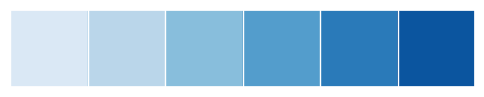

In [34]:
sns.palplot(sns.color_palette('Blues'))

如果想要翻转渐变，可以在面板中添加一个_r 后缀

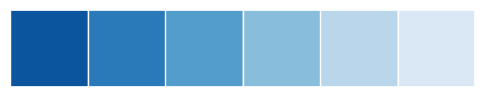

In [35]:
sns.palplot(sns.color_palette('Blues_r'))

light_palette() 和dark_palette() 调用定制的连续调色板

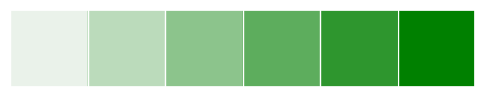

In [36]:
sns.palplot(sns.light_palette('green'))

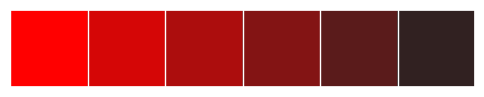

In [37]:
sns.palplot(sns.dark_palette("red",reverse = True))

In [38]:
x,y = np.random.multivariate_normal([0,0],[[1,-.5],[-.5,1]],size = 300).T
pal = sns.dark_palette("red",as_cmap = True)
sns.kdeplot(x,y,cmap = pal)

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

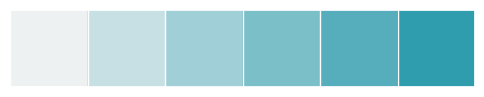

In [39]:
# 画图时，通常先指定画图的区间
sns.palplot(sns.light_palette((210,90,60),input = 'husl'))